# Training and Assessing Tree-based Models with Scikit-Learn

__COMP3411 week 2 Tutorial__

- Developers: Maryam Hashemi and Gustavo Batista
- School of Computer Science and Engineering, UNSW Sydney
- Last Update 27th August 2025

In [2]:
######################## 1 ##################################

# NumPy and matplotlib libraries for numerical computation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for dataset
from sklearn.datasets import load_iris

In [10]:
######################## 1 ##################################

# Load the Iris dataset
iris = load_iris(as_frame=True)

# To do
# Convert it into a Pandas DataFrame
# Display the first few rows of the dataset

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


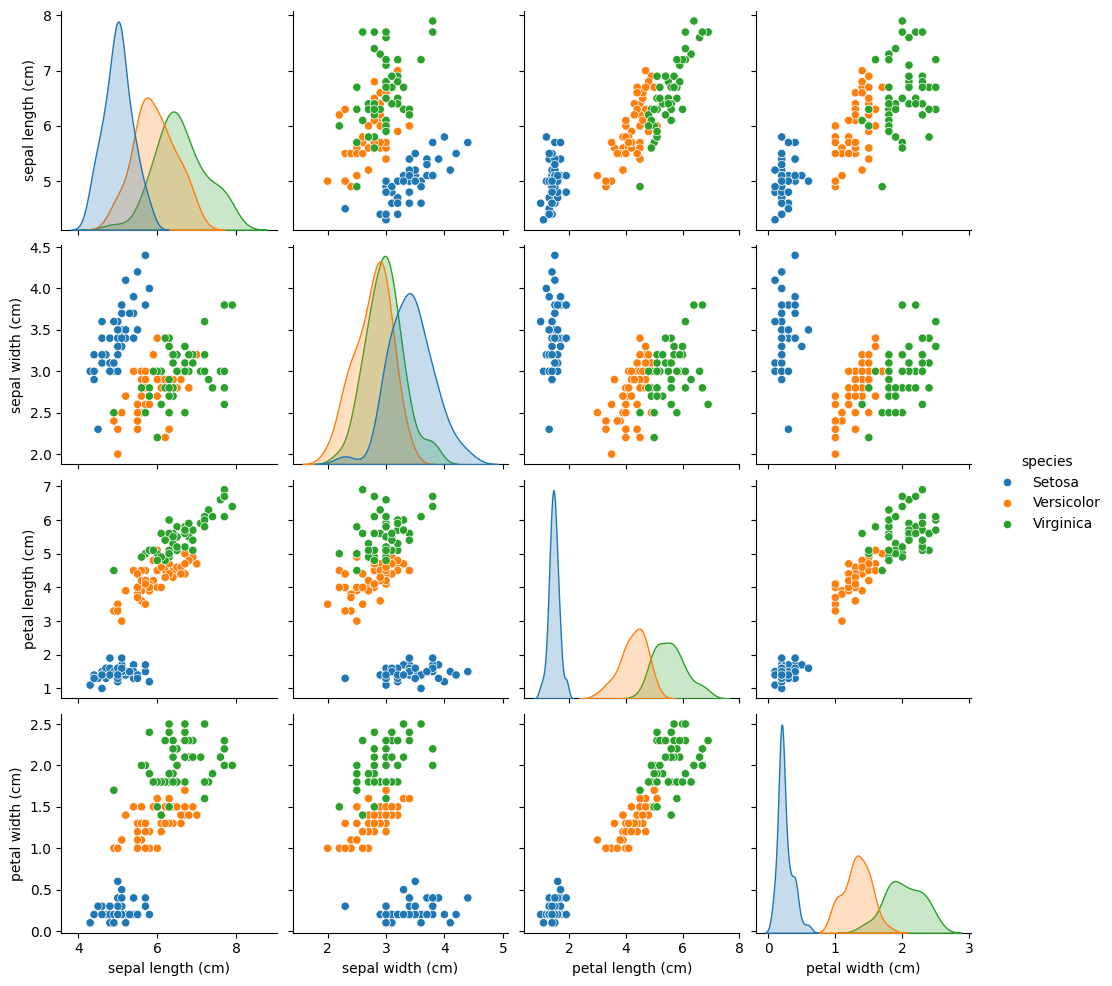

In [23]:
######################## 1 ##################################
from pandas.plotting import scatter_matrix

# Map target integers to class names for better visualization
iris_df['species'] = iris_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

#To do
# Create a scatter plot matrix
# scatter_matrix(iris_df[iris.feature_names], figsize=(10, 10))
sns.pairplot(iris_df, hue='species', vars=iris.feature_names)

# Display the plot
plt.show()

In [14]:
######################## 1.1 ##################################

def compute_entropy(p):
    """
    Compute the entropy of a probability distribution.

    Parameters:
    - p (numpy.ndarray): 1D array of class probabilities (must sum to 1).

    Returns:
    - float: The entropy value.
    """
    entropy = 0
    for single_p in p:
        if single_p > 0:
            entropy += -single_p * np.log2(single_p)
    return entropy


# Test cases
print(compute_entropy(np.array([0.5, 0.5])))   
print(compute_entropy(np.array([0, 1])))       
print(compute_entropy(np.array([1, 0]))) 
print(compute_entropy(np.array([0.3, 0.7])))     

1.0
0.0
0.0
0.8812908992306927


In [8]:
######################## 1.2 ##################################

def compute_class_distribution(labels):
    """
    Compute the proportion of each class in the given labels.

    Parameters:
    - labels (numpy.ndarray): 1D array of class labels.

    Returns:
    - numpy.ndarray: 1D array of class proportions.
    """
    _, counts = np.unique(labels, return_counts=True)

    return counts / counts.sum()


# Test cases
print(compute_class_distribution(np.array([0, 0, 0, 1, 1, 1])))              
print(compute_class_distribution(np.array([0, 0, 0, 0, 0, 1])))              
print(compute_class_distribution(np.array(['a', 'a', 'b', 'b', 'c', 'c'])))      

[0.5 0.5]
[0.83333333 0.16666667]
[0.33333333 0.33333333 0.33333333]


=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


=== Test Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 

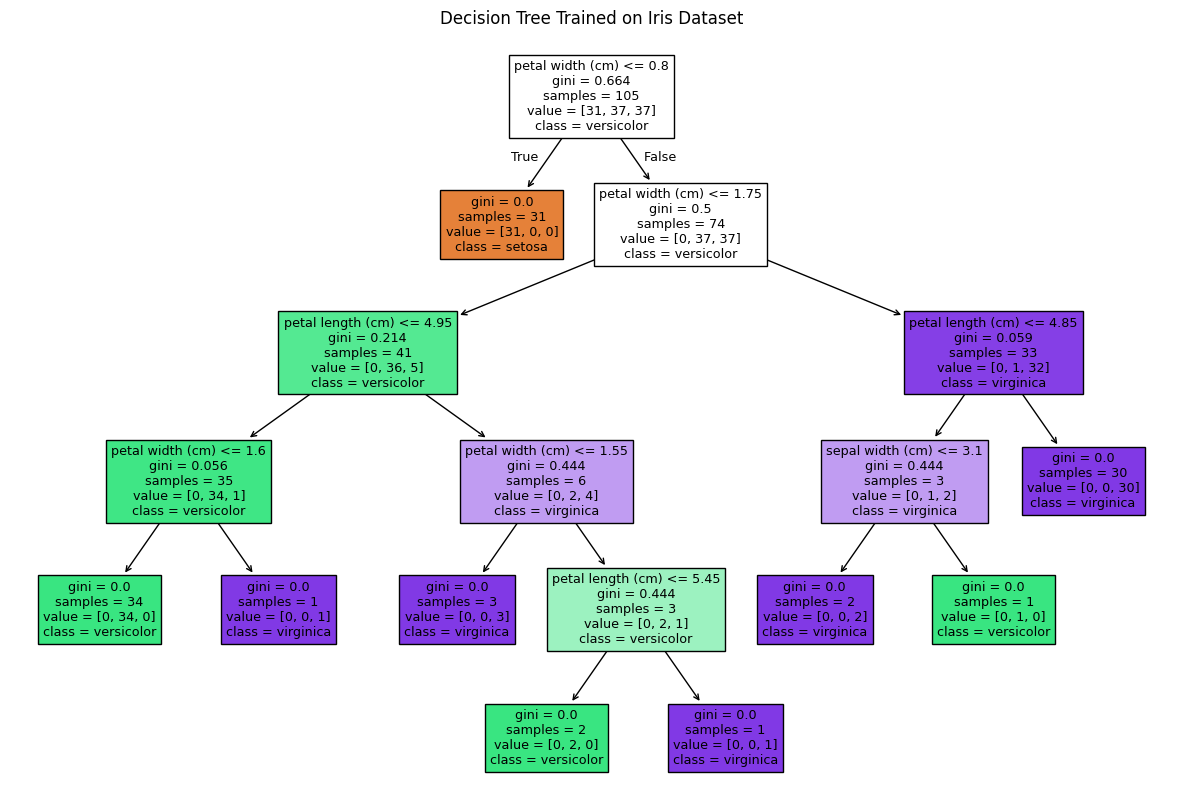

In [18]:
######################## 2 ##################################
# Scikit-learn libraries for models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Divide the DataFrame into attributes (features) and class labels
# All columns except the last one (features)
X = iris_df[iris.feature_names] 
# The last column (class labels) 
y = iris_df['target']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on training and test sets
# Why to use the model to predict the training set? It was trained on it. 
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=list(iris.target_names), filled=True)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

In [19]:
######################## 3.1 Bagged Trees ##################################
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Divide the DataFrame into attributes (features) and class labels
X = iris_df[iris.feature_names]  # All columns except the last one (features)
y = iris_df['target'] # The last column (class labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base estimator (decision tree)
base_tree = DecisionTreeClassifier()

# Initialize Bagging Classifier
bagged_clf = BaggingClassifier(estimator=base_tree)

# Train the bagged classifier
bagged_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = bagged_clf.predict(X_train)
y_test_pred = bagged_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


=== Test Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 

In [ ]:
######################## 3.2 Random Forests ##################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Divide the DataFrame into attributes (features) and class labels
X = iris_df[iris.feature_names] # All columns except the last one (features)
y = iris_df['target'] # The last column (class labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier()

# Train the random forest
rf_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


=== Test Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 

In [21]:
######################## 3.3 AdaBoost ##################################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Divide the DataFrame into attributes (features) and class labels
X = iris_df[iris.feature_names] # All columns except the last one (features)
y = iris_df['target'] # The last column (class labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimator: shallow decision tree
base_tree = DecisionTreeClassifier()

# Initialize AdaBoost classifier
boosted_clf = AdaBoostClassifier(estimator=base_tree)

# Train AdaBoost
boosted_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = boosted_clf.predict(X_train)
y_test_pred = boosted_clf.predict(X_test)

# Compute and print performance metrics
print("=== Training Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

=== Training Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


=== Test Performance ===
Accuracy: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 